In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
rp = np.ones(10000) #rp over z dimension
z_points = np.linspace(0,1,10000)
C = (1-np.tanh(z_points*5-2))/2
#C = np.linspace(1,0.5,10002) #C over z dimension
#C[1001] = 0
dC_dz = np.zeros(10000) #dC/dz over z-dimension
d2C_dz2 = np.zeros(10000) #d^2C/dz^2 over z-dimension

print(len(dC_dz[1:-1]))
print(len((C[2:] - C[:-2])))
k_het=1
D_g=1
Vs=1

t = np.linspace(0,1000,1000)
for i in range(5000):
    #C[C>1]  = 1
    C[C<0] = 0
    dC_dz[1:-1] = (C[2:] - C[:-2])*10000
    dC_dz[0] = (C[1] - C[0])*10000 #forward difference left boundary
    dC_dz[-1] = (C[-1] - C[-2])*10000 #backward difference left boundary
    d2C_dz2[1:-1] = ( C[2:] - 2*C[1:-1] + C[:-2] ) * 10000 * 10000
    d2C_dz2[0] = ( C[2] - 2*C[1] + C[0] ) * 10000 * 10000 #forward difference left boundary
    d2C_dz2[-1] = ( C[-1] - 2*C[-2] + C[-3] ) * 10000 * 10000 #backward difference left boundary
    #print(d2C_dz2)
    dC_dz = dC_dz + (2*k_het*C)/(rp*D_g) / 10000 * 0.01
    C = C + dC_dz / 10000 *0.01

    if any(rp<0):
        break
    #if any(C<0):
        #break
    
    rp = rp - 1/1000 * rp * k_het * C * Vs

print(i)
print(C)

9998
9998
4999
[0.98016948 0.98013061 0.98013061 ... 0.00247138 0.00247139 0.00247139]


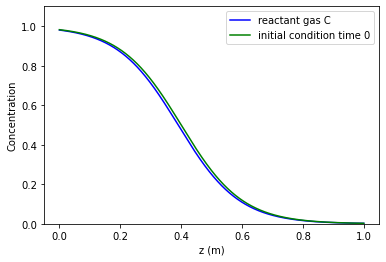

In [3]:
plt.plot(z_points,C,'b-', label='reactant gas C')
C_init = (1-np.tanh(z_points*5-2))/2
plt.plot(z_points,C_init,'g-', label= 'initial condition time 0')
plt.xlabel('z (m)')
plt.ylabel('Concentration')
plt.ylim([0,1.1])
plt.legend()
plt.savefig('reacting_gas_concentration_versus_depth.png', dpi=220)

[0.00738754 0.0073889  0.00738892 ... 0.98771868 0.98771892 0.98771904]


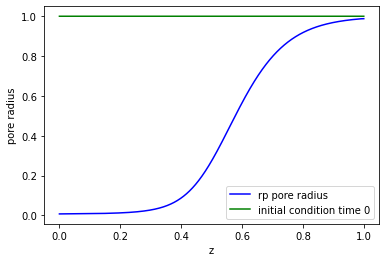

In [6]:
plt.plot(z_points,rp,'b-', label='rp pore radius')
rp_init = np.ones(10000)
plt.plot(z_points,rp_init,'g-', label='initial condition time 0')
plt.xlabel('z')
plt.ylabel('pore radius')
plt.legend()
plt.savefig('pore_radius_versus_depth.png', dpi=220)
print(rp)

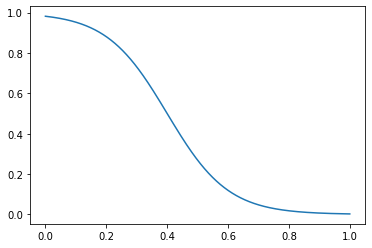

In [5]:
z_points = np.linspace(0,1,10000)
C = (1-np.tanh(z_points*5-2))/2
plt.plot(z_points,C)